Enter the stock ticker symbol (e.g., AAPL for Apple): AAPL
Enter the start date (YYYY-MM-DD): 2005-05-10
Enter the end date (YYYY-MM-DD): 2008-02-25
Fetching data for AAPL...


[*********************100%***********************]  1 of 1 completed

Data for AAPL fetched successfully.
Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.1143
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0159
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0060
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0047
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0037
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0035
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0034
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0028
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0031
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0028
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0032
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0029
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0024
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0025
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0033
Epoch 16/50
16/

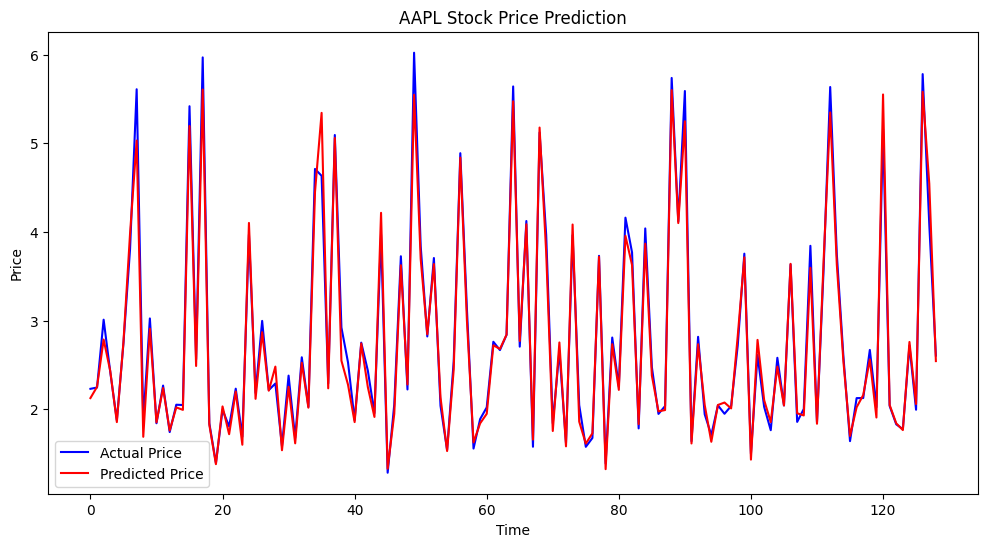

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Function to Fetch Stock Data with Validation
def get_stock_data(ticker, start_date, end_date):
    try:
        print(f"Fetching data for {ticker}...")
        data = yf.download(ticker, start=start_date, end=end_date)
        if data.empty:
            raise ValueError(f"No data found for {ticker} in the given date range.")
        print(f"Data for {ticker} fetched successfully.")
        return data['Close']
    except Exception as e:
        print(f"Error: {e}")
        return None

# Function to Preprocess Data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))
    return scaled_data, scaler

# Function to Prepare Training and Testing Data
def prepare_data(scaled_data, time_step=60):
    X, y = [], []
    for i in range(len(scaled_data) - time_step - 1):
        X.append(scaled_data[i : i + time_step, 0])
        y.append(scaled_data[i + time_step, 0])
    return np.array(X), np.array(y)

# LSTM Model Function
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(input_shape, 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Main Program
def main():
    stock_ticker = input("Enter the stock ticker symbol (e.g., AAPL for Apple): ").upper()
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")

    # Fetch Stock Data
    stock_data = get_stock_data(stock_ticker, start_date, end_date)

    if stock_data is None:
        print("Please check the stock ticker or date range and try again.")
        return

    # Preprocess Data
    scaled_data, scaler = preprocess_data(stock_data)

    # Prepare Data for Model
    time_step = 60  # Number of previous days to consider
    X, y = prepare_data(scaled_data, time_step)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Split Data into Train and Test Sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build LSTM Model
    model = build_lstm_model(X_train.shape[1])

    # Train the Model
    model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1)

    # Predict and Inverse Transform Results
    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Visualize Results
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label="Actual Price", color='blue')
    plt.plot(y_pred, label="Predicted Price", color='red')
    plt.title(f"{stock_ticker} Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


In [8]:
!pip install yfinance tensorflow scikit-learn matplotlib